In [1]:
#import library
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt

(351, 351, 3)


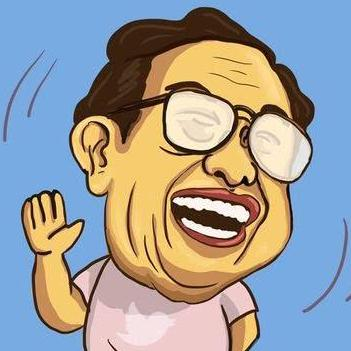

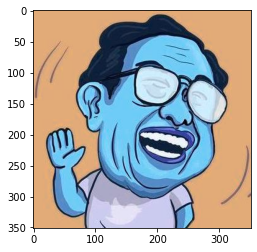

In [2]:
# baca gambar
img = cv2.imread("avatargusdur.jpg")
print(img.shape)
cv2_imshow(img)
plt.imshow(img)

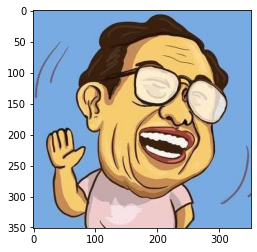

In [3]:
# jika menggunakan menggunakan matplotlib.pyplot maka ubah jenis warna dari BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
# cek resolusi gambar
h, w = img.shape[:2]
print(f'resolusi citra {w}x{h}')

resolusi citra 351x351


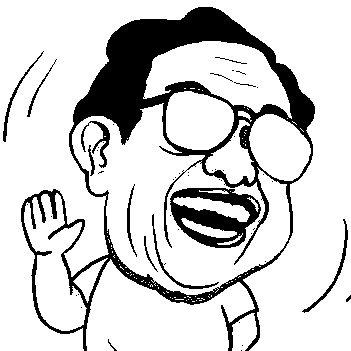

In [5]:
# threshholding iamge
thresh_img = np.zeros([h, w], dtype = 'uint8')

for y in range(h):
  for x in range(w):
    r = img[y, x, 0]
    g = img[y, x, 1]
    b = img[y, x, 2]
    gray = (r*0.2989) + (g * 0.5870) + (b*0.1140)
    if gray >= 128:
      thresh_img[y, x] = 255
    else:
      thresh_img[y, x] = 0

cv2_imshow(thresh_img)

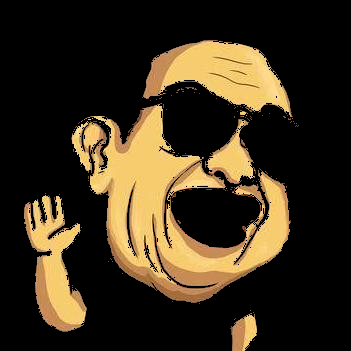

-1

In [6]:
# segementasi warna

img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
yellow_lower = np.array([10, 100, 100])
yellow_upper = np.array([30, 255, 255])
mask = cv2.inRange(hsv_img, yellow_lower, yellow_upper)
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
# cv2_imshow(mask)

segment = cv2.bitwise_and(img, mask)

cv2_imshow(segment)
cv2.waitKey(0)

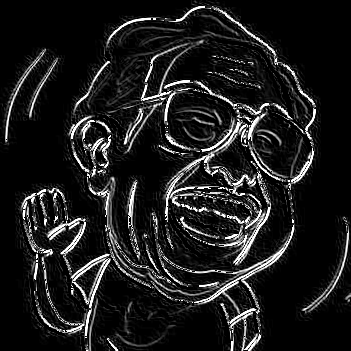

In [7]:
# deteksi tepi
gx = np.array([
 [-1,0,1],
 [-2,0,2],
 [-1,0,1]
])
gy = np.array([
 [1,2,1],
 [0,0,0],
 [-1,-2,-1]
])

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
Ix = cv2.filter2D(gray_img, -1, gx)
Iy = cv2.filter2D(gray_img, -1, gy)
res_sobel = abs(Ix + Iy)

cv2_imshow(res_sobel)